## Column Definitions
            age		-	age	
			bp		-	blood pressure
			sg		-	specific gravity
			al		-   	albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo		-	hemoglobin
			pcv		-	packed cell volume
			wc		-	white blood cell count
			rc		-	red blood cell count
			htn		-	hypertension
			dm		-	diabetes mellitus
			cad		-	coronary artery disease
			appet		-	appetite
			pe		-	pedal edema
			ane		-	anemia
			class		-	class	

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

In [12]:
df = pd.read_csv('chronic_kidney_data_with_id.csv')

df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [13]:
# 3. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nMissing values percentage per column:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


Missing values per column:
id         0
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

Missing values percentage per column:
rbc      38.00
rbcc     32.75
wbcc     26.50
pot      22.00
sod      21.75
pcv      17.75
pc       16.25
hemo     13.00
su       12.25
sg       11.75
al       11.50
bgr      11.00
bu        4.75
sc        4.25
bp        3.00
age       2.25
ba        1.00
pcc       1.00
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
dtype: float64


In [14]:
# 4. Descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())


Descriptive Statistics for Numerical Features:
               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   200.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      1.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%    100.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    200.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    300.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    400.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  \
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000   
mean   148.036517   57.425722    3.072454  137.528754    4.6

In [15]:
# 5. Categorical value distributions
print("\nCategorical Feature Distributions:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    print(f"{col} value percentages:")
    print(df[col].value_counts(normalize=True) * 100)


Categorical Feature Distributions:

rbc value counts:
rbc
normal      201
abnormal     47
Name: count, dtype: int64
rbc value percentages:
rbc
normal      81.048387
abnormal    18.951613
Name: proportion, dtype: float64

pc value counts:
pc
normal      259
abnormal     76
Name: count, dtype: int64
pc value percentages:
pc
normal      77.313433
abnormal    22.686567
Name: proportion, dtype: float64

pcc value counts:
pcc
notpresent    354
present        42
Name: count, dtype: int64
pcc value percentages:
pcc
notpresent    89.393939
present       10.606061
Name: proportion, dtype: float64

ba value counts:
ba
notpresent    374
present        22
Name: count, dtype: int64
ba value percentages:
ba
notpresent    94.444444
present        5.555556
Name: proportion, dtype: float64

htn value counts:
htn
no     251
yes    147
Name: count, dtype: int64
htn value percentages:
htn
no     63.065327
yes    36.934673
Name: proportion, dtype: float64

dm value counts:
dm
no      260
yes     137
\tno  

Top features for predicting kidney disease:
   Feature  Importance
15     pcv    0.162199
11      sc    0.161281
14    hemo    0.155964
2       sg    0.105856
17    rbcc    0.102595
3       al    0.072591
19      dm    0.047541
18     htn    0.038781
12     sod    0.034344
9      bgr    0.031674


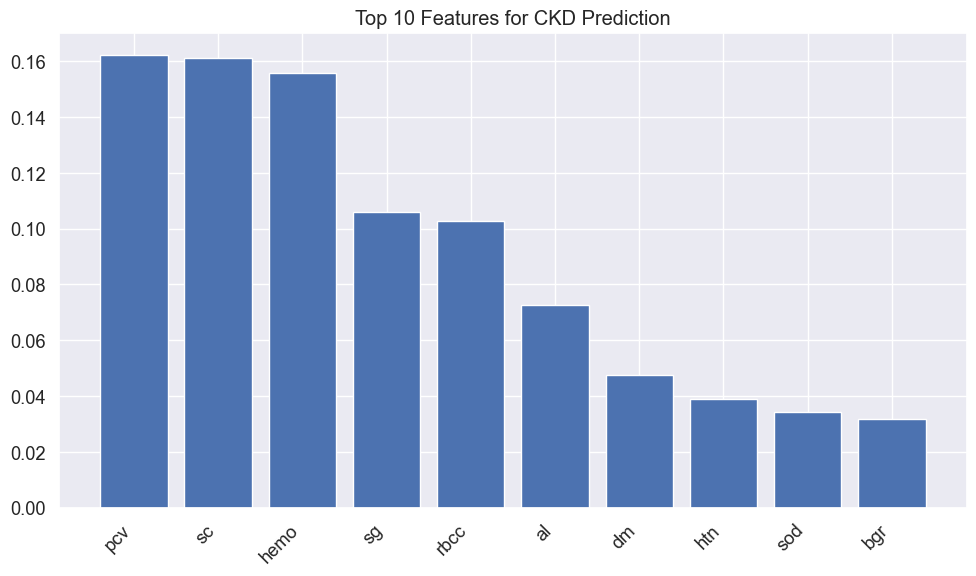

In [19]:
# 2. Convert ALL categorical/text columns to numbers - this fixes the error
for col in df.columns:
    # If column contains text (object dtype)
    if df[col].dtype == 'object':
        # For the target variable
        if col == 'class':
            df[col] = df[col].map({'ckd': 1, 'notckd': 0})
        # For all other text columns (yes/no, normal/abnormal, etc.)
        else:
            # Get unique values and map them to integers
            unique_values = df[col].dropna().unique()
            value_map = {val: i for i, val in enumerate(unique_values)}
            # Apply mapping
            df[col] = df[col].map(value_map)

# 3. Handle missing values
df = df.fillna(df.median())

# 4. Prepare data
X = df.drop(['class', 'id'], axis=1)
y = df['class']

# 5. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)  # This will now work because all data is numeric

# 6. Get feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# 7. Print results
print("Top features for predicting kidney disease:")
print(importance.head(10))

# 8. Plot
plt.figure(figsize=(10, 6))
plt.bar(importance['Feature'].head(10), importance['Importance'].head(10))
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Features for CKD Prediction')
plt.tight_layout()
plt.savefig('ckd_features.png')



In [20]:
# Therefore will use pcv, sc and hemo to make prediction!